**Pengenalan dengan Computer Vision**

Apa sih computer vision ?

Computer Vision adalah cabang ilmu komputer yang bertujuan untuk memungkinkan mesin melihat, memahami, dan menganalisis gambar dan video secara mirip dengan cara manusia. Tujuan utama dari computer vision adalah untuk mengembangkan algoritma dan teknologi yang memungkinkan komputer untuk memproses dan memahami informasi visual dari dunia nyata.

Image Classification (klasifikasi gambar) adalah salah satu tugas dalam computer vision yang bertujuan untuk mengklasifikasikan atau mengidentifikasi kategori atau kelas dari sebuah gambar berdasarkan konten visualnya. Tujuan dari image classification adalah untuk mengajar mesin untuk membedakan atau mengenali objek atau pola tertentu dalam gambar dan mengkategorikannya ke dalam label atau kelas yang sudah ditentukan sebelumnya.

Pada notebook kali ini kita akan membuat image classification sederhana dengan datasets FashionMNIST dengan PyTorch

Pada notebook ini juga mencakup beberapa hal dari yang telah kita pelajari mulai dari :
- Import PyTorch dan Pendukung lainnya
- Download datasets dengan torchvision.datasets, kali ini kita akan menggunakan FashionMNIST dataset
- Explorasi data (explorasi data shape) dan Visualisasikan data gambar FashionMNIST
- Membuat model sederhana untuk Image Classification
- Melakukan Training dan Evaluasi per Epoch untuk melihat akurasi dari model yang telah dibuat
- Melakukan Prediksi dan visualisasikan

**Pertama dimulai dari melakukan import pada pytorch dan library pendukung seperti DataLoader dan ToTensor**

In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader

from torchvision import datasets
from torchvision.transforms import ToTensor

Setelah melakukan import apa saja yang diperlukan, kita download terlebih dahulu dataset yang akan kita gunakan

kita akan menggunakan dataset FashionMNIST

In [2]:
# Setup variable Training data
train_data = datasets.FashionMNIST(
    root="data",
    download=True,
    train=True,
    transform=ToTensor()
)

# Setup variable Test Data
test_data = datasets.FashionMNIST(
    root="data",
    download=True,
    train=False,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:01<00:00, 17228599.27it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 268381.84it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 4020818.15it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 21189673.20it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



Kenapa kita bagi menjadi train_data dan test_data ?

pertama tama komputer akan melakukan training dengan data training untuk mendeteksi pola terlebih dahulu, setelah itu kita akan menggunakan data baru (test_data) untuk melakukan evaluasi apakah model yang telah kita buat sudah cukup baik untuk mengenali pola pada gambar baru

**Mari kita lakukan Explorasi Data terlebih dahulu**

In [3]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [4]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

Train data memiliki total data : 60.000 gambar dengan label nya

Sedangkan Test data memiliki total data : 10.000 gambar dengan label nya

Mari kita lihat apa isi dari train_data pada index ke 0, ingat karna data yang telah di download menjadi tensor maka kita bisa ambil index ke 0 dan tergantung pada berapa jumlah n pada dataset maka dari itu kita perlu explorasi terlebih dahulu untuk mengetahui data apa yang sedang kita kerjakan

In [5]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

Bisa dilihat pada data diatas : 

train_data[0] berisi data pixel gambar pada train_data[0][0] dan memiliki label pada train_data[0][1]

bagaimana saya bisa tahu ? karna pada train_data[0][0] berisi pixel yang akan berubah menjadi gambar jika disatukan mari kita lanjut explorasi data untuk melihat shape nya

In [6]:
print(f"Image : {train_data[0][0]}\nLabel : {train_data[0][1]}")

Image : tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157,

In [7]:
train_data[0][0].shape

torch.Size([1, 28, 28])

Bisa dilihat torch.Size([1, 28, 28])

apa maksud data diatas ?

1 adalah chanel color yang dimiliki data FashionMNIST
28,28 adalah ukuran gambar (pixel)

jadi total pixel dari 1 gambar sample FashionMNIST adalah 28 x 28

**Agar kita dapat lebih memahami data diatas, dari pada sudah payah untuk melihat angka angka yang sangat banyak maka dari itu kita akan menggunakan matplotlib untuk memvisualisasikan data tensor diatas menjadi gambar**

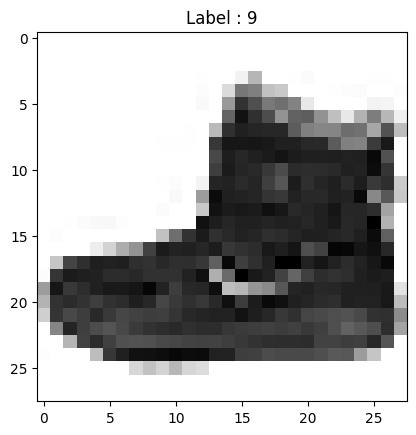

In [8]:
# Import Matplotlib
import matplotlib.pyplot as plt

# Menentukan With dan Height dari canvas yang akan kita buat, kita akan tinggalkan kosong untuk saat ini
plt.figure()

# Menampilkan gambar
plt.imshow(train_data[0][0].squeeze(),cmap=plt.cm.binary)

# Menambahkan Title
plt.title(f"Label : {train_data[0][1]}")

# Show Image
plt.show()

**Boom**

Kita bisa lihat ternyata data gambar index ke 0 yaitu gambar sepatu boot (Ankle Boot)

dari pada melihat angka yang rumit, bukankah lebih mudah jika memvisualisasikan nya seperti ini ?

Mungkin dari kalian ada yang notice bahwa label nya itu angka 9.

apa itu 9 ? kalau kita melihat dokumentasi dataset dari FashionMnist 9 itu adalah untuk "Ankle boot"

berikut adalah data labels nya :

labels_map = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

Mari kita tambahkan data labels nya lalu kita buat title nya menjadi text agar lebih mudah dipahami

In [9]:
labels_map = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

Labels diatas adalah data label yang saya ambil dari dokumentasi Fashion MNIST

kalian bisa cek disini untuk detail lebih lanjut : [Data FMNIST](https://github.com/zalandoresearch/fashion-mnist)

dari pada kita harus melakukan visualisasi gambar dengan hardcode menentukan index gambar yang akan kita pilih, bukan kah lebih baik kita acak saja index nya dan visualisasikan ?

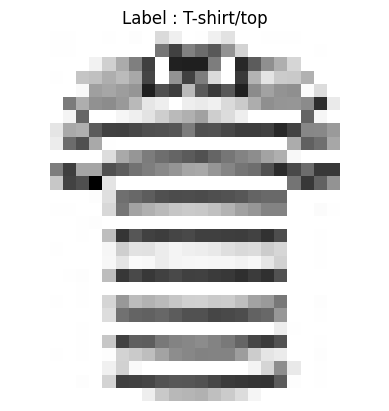

In [10]:
# Import random untuk mengacak angka
import random 

# Membuat fungsi untuk menampilkan gambar dengan index random
def show_random_image(index):
    plt.figure()
    
    # plt.cm.binary berfungsi mengubah gambar menjadi hitam putih
    plt.imshow(train_data[index][0].squeeze(),cmap=plt.cm.binary)
    
    # plt.axis(False) kita akan hilangkan axis x dan axis y karna tidak diperlukan
    plt.axis(False)
    
    # Menampilkan label sesuai dengan data yang telah kita buat
    plt.title(f"Label : {labels_map[train_data[index][1]]}")
    plt.show()

# Membuat variable random_number dan menampilkan gambar
random_number = torch.randint(0, len(train_data), ()).item()
show_random_image(random_number)

**Kita sudah berhasil menampilkan gambar random, tapi mungkin kita juga ingin melihat data lebih banyak ?**

kita akan membuat fungsi untuk menampilkan 25 gambar dengan matplotlib dengan bantuan subplot

subplot(cols,row,item)

jadi kita akan menampilkan 5 baris ke pinggir, 5 baris kebawah

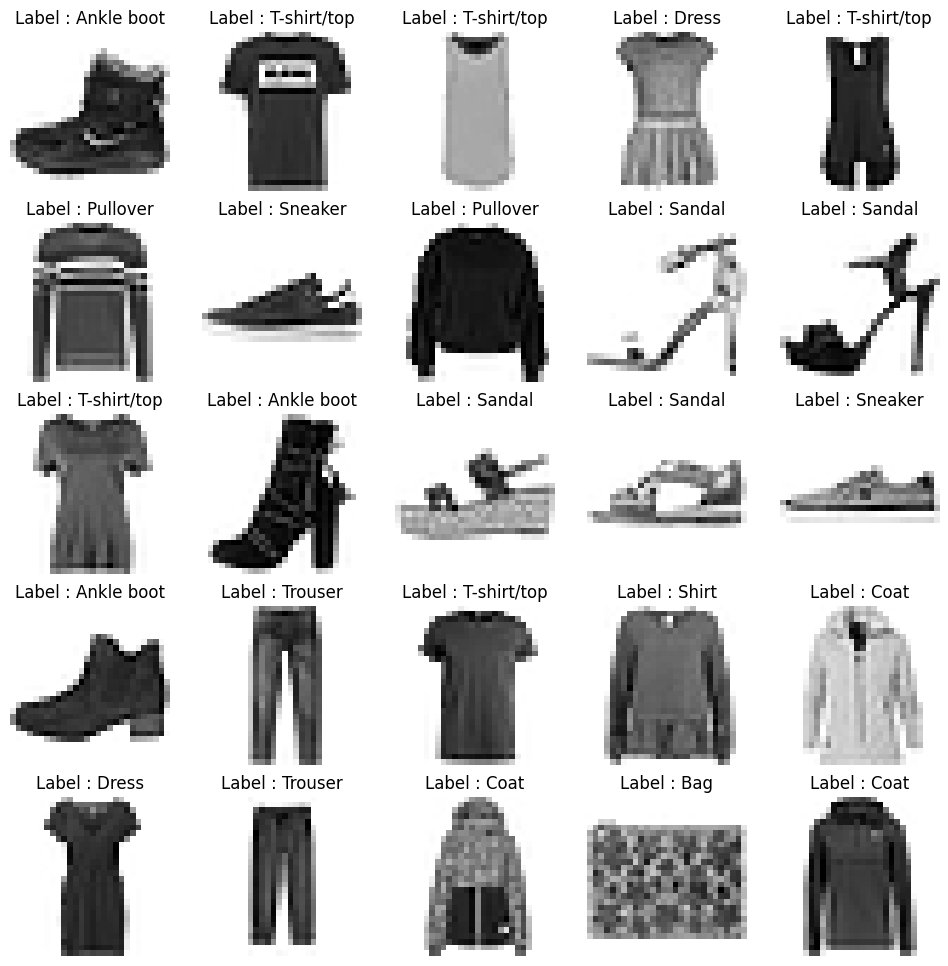

In [11]:
def show_25_image():
    plt.figure(figsize=(12,12))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.imshow(train_data[i][0].squeeze(),cmap=plt.cm.binary)
        plt.axis(False)
        plt.title(f"Label : {labels_map[train_data[i][1]]}")
    plt.show()

show_25_image()

Explorasi data ? sudah

Visualisasikan gambar ? sudah

Apa selanjutnya ? kita akan mulai membuat data loader untuk training model dan melakukan image classification pada data FashionMNIST

**Membuat Data Loader**

kita akan menggunakan manual_seed agar pada saat shuffle kita akan melakukan order yang sama

sebagai contoh : 

**Tanpa Manual Seed**
[1,2,3,4,5] -> [1,3,5,4,2]

saat kita jalankan kembali code nya 
[1,2,3,4,5] -> [1,4,5,3,2]

hal ini membuat data tidak konsisten pada saat order dan mungkin memberatkan kinerja mesin

**Dengan Manual Seed**
[1,2,3,4,5] -> [1,3,5,4,2]

saat kita jalankan kembali code nya 
[1,2,3,4,5] -> [1,3,5,4,2]

Order akan dijalankan sama seperti yang sebelumnya

In [12]:
torch.manual_seed(42)

train_loader = DataLoader(
    train_data,
    batch_size=64,
    shuffle=True,
    num_workers=4
)

test_loader = DataLoader(
    train_data,
    batch_size=64,
    shuffle=False,
    num_workers=4
)

train_loader,test_loader

(<torch.utils.data.dataloader.DataLoader at 0x79700dbf37f0>,
 <torch.utils.data.dataloader.DataLoader at 0x7970b3cca2c0>)

Bisa dilihat data train dan test kita sudah berubah bentuk menjadi Data Loader

bentuk sebelum menjadi data loader

[1,28,28]

setelah menjadi data loader kita menjadikan batch agar meringankan pada saat training

contoh : 
[1,1,28,28]

1 adalah batch size
1 adalah chanel color
28,28 adalah ukuran gambar

tidak lupa juga untuk mempercepat proses training kita akan menggunakan GPU

kita akan set device menjadi "cuda" agar mempercepat proses training

In [13]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [14]:
train_data[0][0].shape

torch.Size([1, 28, 28])

Untuk apa kita menampilkan shape nya ? kita akan cari tahu lebih lanjut di code dibawah

sebelumnya mari kita buat model nya terlebih dahulu

In [15]:
from torch.nn import functional as F

class ModelGambar(nn.Module):
    def __init__(self):
        super().__init__()
        self.ln1 = nn.Linear(1*28*28,512)
        self.ln2 = nn.Linear(512,512)
        self.ln3 = nn.Linear(512,10)
    def forward(self,x):
        x = x.view(x.size(0),-1)
        x = F.relu(self.ln1(x))
        x = F.relu(self.ln2(x))
        x = self.ln3(x)
        return x
    
model = ModelGambar().to(device)
print(model)

ModelGambar(
  (ln1): Linear(in_features=784, out_features=512, bias=True)
  (ln2): Linear(in_features=512, out_features=512, bias=True)
  (ln3): Linear(in_features=512, out_features=10, bias=True)
)


**Mungkin kalian bingung,biar saya jelaskan lebih lanjut model diatas**

1. kita membuat ln1 dengan input 1*28*28 dan output 512
2. kita membuat ln2 dengan input 512 dan output 512
3. kita membuat ln3 dengan input 512 dan output 10

**Penjelasan**
kenapa 1*28*28 atau 1*28x28 ? data gambar memiliki 1 chanel dan 28x28 pixel
ini adalah input gambar yang sesuai seperti shape yang telah kita check diatas

lalu kita proses gambar yang sudah dimasukan menjadi input menjadi 512 fully connected layer 
proses berlanjut menjadi 512 kembali pada ln2 dan pada ln3 kita akan membuat output menjadi 10 karna total labels nya ada 10

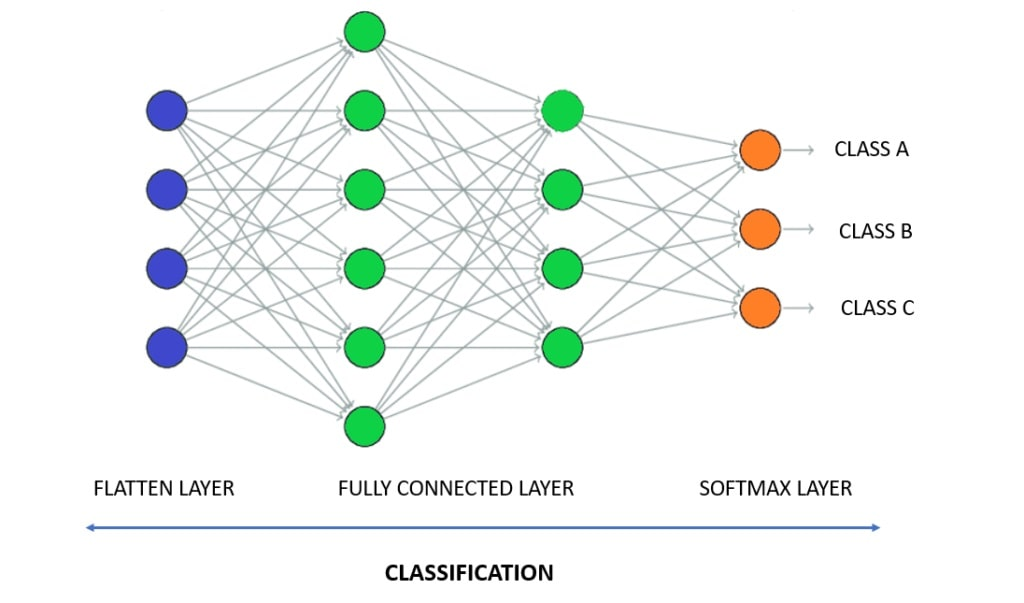

Pada data gambar diatas Kita bisa asumsikan seperti ini dan
dengan model yang telah kita buat akan menjadi seperti ini 

- pada flatten layer kita memasukan 1 input gambar (1 bulat biru) 
- pada fully connected layer 1 kita menjadikan 512 fully connected layer (512 bulat hijau)
- pada fully connected layer 2 kita menjadikan 512 fully connected layer (512 bulat hijau)
- pada softmax layer kita menjadikan 512 fully connected layer menjadi 10 (10 bulat orange)

In [16]:
dummy = torch.randn(1, 1, 28, 28).to(device)
output = model(dummy)
print(output)

tensor([[ 0.1188,  0.2140, -0.0639, -0.0095, -0.0212,  0.1609,  0.0025,  0.0688,
         -0.0707,  0.0850]], device='cuda:0', grad_fn=<AddmmBackward0>)


Code diatas bermaksud untuk melakukan pengechekan apakah model sudah sesuai dengan input yang kita mau

pada kasus FashionMNIST karna shape nya seperti ini : [1, 1, 28, 28]

dan model mengeluarkan output, berarti tidak ada error pada model yang telah dibuat dan siap untuk training

Mari kita tentukan Loss dan Optimizer nya terlebih dahulu

kita akan menggunakan CrossEntropyLoss untuk menghitung loss dan Adam Optimizer dengan learning rate 1e-3 (0.001)

In [17]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=1e-3)

**Proses Training dan Evaluasi Per Epoch (menghitung akurasi)**

In [18]:
num_epochs = 15

for epoch in range(num_epochs):
    # Training Model
    model.train()
    for batch,(image,label) in enumerate(train_loader):
        image,label = image.to(device),label.to(device)
        pred = model(image)
        loss = loss_fn(pred,label)
        
        # Backward
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
        if batch % 100 == 0:
            print(f"Epochs : {epoch + 1} Batch : {batch}/{len(train_loader)} Loss : {loss.item():.4f}")
    
    # Evaluasi Model per Epoch
    model.eval()
    correct = 0
    with torch.no_grad():
        for image,label in test_loader:
            image,label = image.to(device),label.to(device)
            pred = model(image)
            correct += (pred.argmax(1) == label).type(torch.float).sum().item()
        correct /= len(test_loader.dataset)
        print(f"Evaluasi Epoch {epoch + 1}\nAkurasi: {(100*correct):.1f}%")

Epochs : 1 Batch : 0/938 Loss : 2.2948
Epochs : 1 Batch : 100/938 Loss : 0.6320
Epochs : 1 Batch : 200/938 Loss : 0.5596
Epochs : 1 Batch : 300/938 Loss : 0.4097
Epochs : 1 Batch : 400/938 Loss : 0.4246
Epochs : 1 Batch : 500/938 Loss : 0.4355
Epochs : 1 Batch : 600/938 Loss : 0.5133
Epochs : 1 Batch : 700/938 Loss : 0.4070
Epochs : 1 Batch : 800/938 Loss : 0.3777
Epochs : 1 Batch : 900/938 Loss : 0.3024
Evaluasi Epoch 1
Akurasi: 86.2%
Epochs : 2 Batch : 0/938 Loss : 0.4608
Epochs : 2 Batch : 100/938 Loss : 0.2894
Epochs : 2 Batch : 200/938 Loss : 0.2474
Epochs : 2 Batch : 300/938 Loss : 0.1806
Epochs : 2 Batch : 400/938 Loss : 0.2826
Epochs : 2 Batch : 500/938 Loss : 0.4881
Epochs : 2 Batch : 600/938 Loss : 0.4210
Epochs : 2 Batch : 700/938 Loss : 0.6167
Epochs : 2 Batch : 800/938 Loss : 0.3493
Epochs : 2 Batch : 900/938 Loss : 0.4223
Evaluasi Epoch 2
Akurasi: 88.2%
Epochs : 3 Batch : 0/938 Loss : 0.2712
Epochs : 3 Batch : 100/938 Loss : 0.3408
Epochs : 3 Batch : 200/938 Loss : 0.2841

**Boom**

Model sederhana yang kita buat ternyata menghasilkan akurasi yang sangat baik untuk 3 layer saja
dengan akurasi 90% lebih

Setelah melakukan proses training kita bisa visualisasikan hasil prediksi dengan data test yang telah kita buat sebelumnya

**Kita akan membuat single prediction terlebih dahulu**

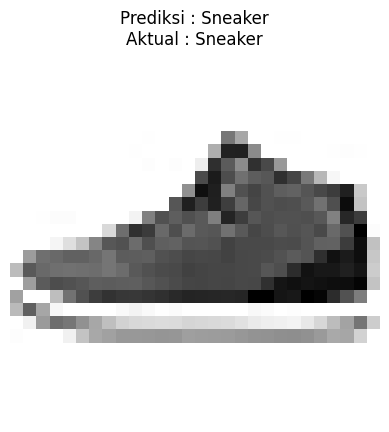

In [19]:
def show_single_prediction_image(index):
    model.eval()
    image,label = test_data[index][0],test_data[index][1]
    with torch.no_grad():
        image = image.to(device)
        pred = model(image)

        plt.figure()
        plt.imshow(image.squeeze().cpu(),cmap=plt.cm.binary)
        plt.title(f"Prediksi : {labels_map[pred[0].argmax(0)]}\nAktual : {labels_map[label]}")
        plt.axis(False)
        plt.show()

random_test = torch.randint(0, len(test_data), ()).item()
show_single_prediction_image(random_test)

**Wow Prediksi nya akurat**

model yang telah kita buat memprediksi gambar dengan sesuai, mari kita lanjutkan untuk menampilkan bulk prediksi dengan 25 gambar dari index 1-25

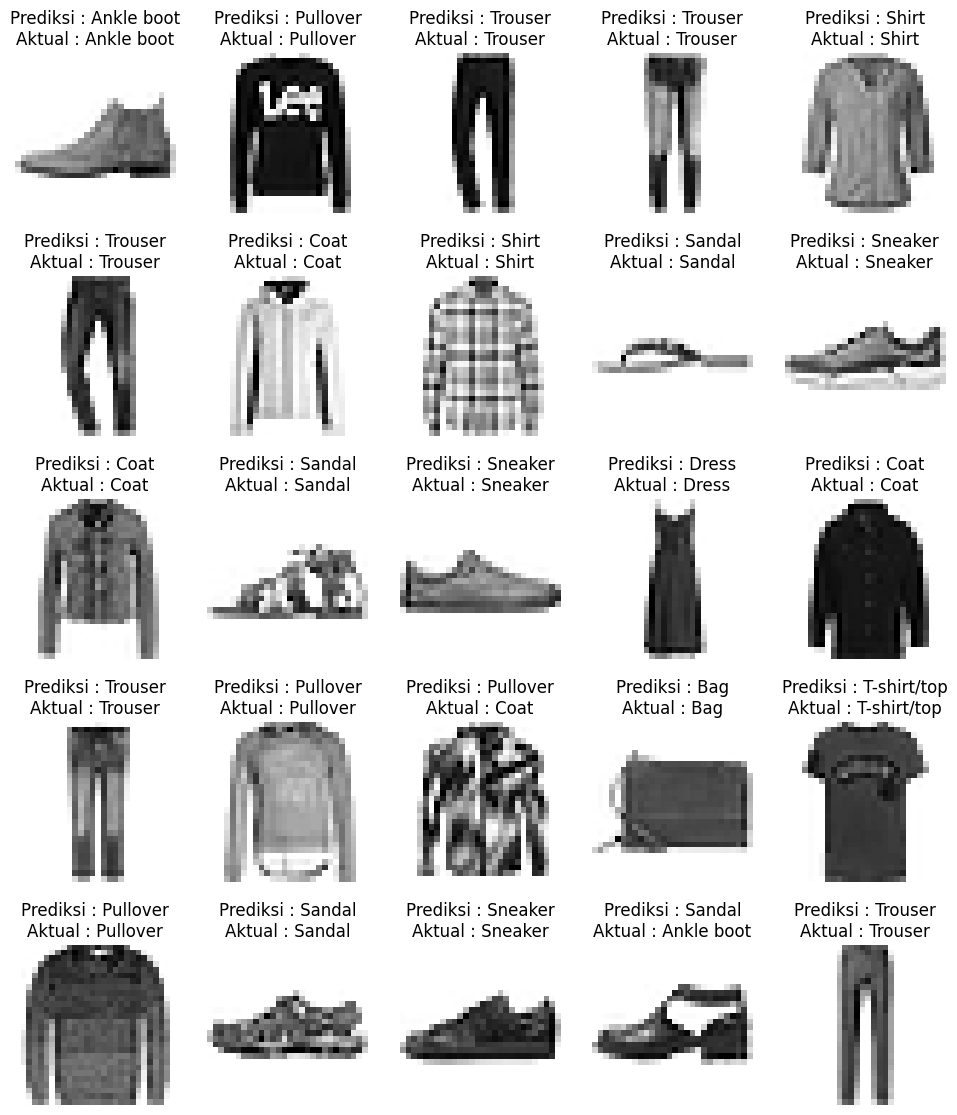

In [20]:
def show_list_prediction_image():
    model.eval()
    plt.figure(figsize=(12,14))
    for i in range(25):
        image,label = test_data[i][0],test_data[i][1]
        with torch.no_grad():
            image = image.to(device)
            pred = model(image)
            
            plt.subplot(5,5,i+1)
            plt.imshow(image.squeeze().cpu(),cmap=plt.cm.binary)
            plt.title(f"Prediksi : {labels_map[pred[0].argmax(0)]}\nAktual : {labels_map[label]}")
            plt.axis(False)
    plt.show()

show_list_prediction_image()

Bisa kita simpulkan dari gambar diatas model kita melakukan prediksi sangat akurat

setelah ini kita akan memahami konsep CNN (Convolutional Neural Network)

**Kesimpulan**

Model Image Classification pertama kita telah berhasil dibuat dengan hasil yang cukup memuaskan

notebook ini telah berhasil membuat pengenalan pada computer vision pada sub bidang Image Classification